# **User Funnel Analysis and Visualization with Matplotlib**

# **Overview**

For our analysis we will use an ecommerce dataset from kaggle (https://www.kaggle.com/datasets/aerodinamicc/ecommerce-website-funnel-analysis) showing the user conversion for each page on the website. We will collect, clean, transform if necessary, analyse, visualize our data and then provide insights about our findings.

# **Collect the data**

In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt

dfHome = pd.read_csv('home_page_table.csv')
dfSearch = pd.read_csv('search_page_table.csv')
dfPaymentConf = pd.read_csv('payment_confirmation_table.csv')
dfPaymentPage = pd.read_csv('payment_page_table.csv')
UserTable = pd.read_csv('user_table.csv')

In [ ]:
homeTab = dfHome.head()
homeTab

,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page


In [ ]:
searchTab = dfSearch.head()
searchTab

,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page
3,780347,search_page
4,383739,search_page


# **Data cleaning**

In [ ]:
homeNull = dfHome.isnull()
print(homeNull)
print("Non null User_id: " + str(homeNull['user_id'].count()))
print("Non null Home_Page: " + str(homeNull['page'].count()))

       user_id   page
0        False  False
1        False  False
2        False  False
3        False  False
4        False  False
...        ...    ...
90395    False  False
90396    False  False
90397    False  False
90398    False  False
90399    False  False

[90400 rows x 2 columns]
Non null User_id: 90400
Non null Home_Page: 90400


In [ ]:
searchNull = dfSearch.isnull()
print(searchNull)
print("Non null User_id: " + str(searchNull['user_id'].count()))
print("Non null Search_Page: " + str(searchNull['page'].count()))

       user_id   page
0        False  False
1        False  False
2        False  False
3        False  False
4        False  False
...        ...    ...
45195    False  False
45196    False  False
45197    False  False
45198    False  False
45199    False  False

[45200 rows x 2 columns]
Non null User_id: 45200
Non null Search_Page: 45200


# **Data transform**

Let's rename the column "page" for each table

In [ ]:
dfHome = dfHome.rename(columns={'page':'First page'})
dfSearch = dfSearch.rename(columns={'page':'Second page'})
dfPaymentPage = dfPaymentPage.rename(columns={'page':'Third page'})
dfPaymentConf = dfPaymentConf.rename(columns={'page':'Fourth page'})

Let's merge all the table into one table

In [ ]:
userData = UserTable.merge(dfHome, how ='outer',on='user_id').merge(
        dfSearch, how ='outer', on='user_id').merge(dfPaymentPage, how ='outer', on='user_id').merge(
        dfPaymentConf, how ='outer', on='user_id')

userData

,user_id,date,device,sex,First page,Second page,Third page,Fourth page
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
90395,307667,2015-03-30,Desktop,Female,home_page,NaN,NaN,NaN
90396,642989,2015-02-08,Desktop,Female,home_page,search_page,NaN,NaN
90397,659645,2015-04-13,Desktop,Male,home_page,search_page,NaN,NaN
90398,359779,2015-03-23,Desktop,Male,home_page,NaN,NaN,NaN


# **Data analysis**

Let's see the user count for each pages in the funnel.

In [ ]:
dataTable = pd.DataFrame([['Phases', 'Users'],
              ['User_Count', UserTable['user_id'].count()],
               ['Home_Page', dfHome['user_id'].count()],
               ['Search_Page', dfSearch['user_id'].count()],
               ['Payment_Page', dfPaymentPage['user_id'].count()],
               ['Payment_Confimation', dfPaymentConf['user_id'].count()]])
               
dataTable

,0,1
0,Phases,Users
1,User_Count,90400
2,Home_Page,90400
3,Search_Page,45200
4,Payment_Page,6030
5,Payment_Confimation,452


We can see that there is a massive decrease in the user's count from the Search Page to the Payment Page. Specially from the Payment page to the Payment confirmation page, that means a huge loss for the company or the user experince can be at fault.

We are going to split our userData table into genre.

In [ ]:
First_Page_Male = (userData['sex'] == 'Male') & (userData['First page'] == 'home_page')
First_Page_Female = (userData['sex'] == 'Female') & (userData['First page'] == 'home_page')

Second_Page_Male = (userData['sex'] == 'Male') & (userData['Second page'] == 'search_page')
Second_Page_Female = (userData['sex'] == 'Female') & (userData['Second page'] == 'search_page')

Third_Page_Male = (userData['sex'] == 'Male') & (userData['Third page'] == 'payment_page')
Third_Page_Female = (userData['sex'] == 'Female') & (userData['Third page'] == 'payment_page')

Fourth_Page_Male = (userData['sex'] == 'Male') & (userData['Fourth page'] == 'payment_confirmation_page')
Fourth_Page_Female = (userData['sex'] == 'Female') & (userData['Fourth page'] == 'payment_confirmation_page')

dataTable_Genre = pd.DataFrame([['Phases', 'Men', 'Women', 'Total'],
               ['Home', First_Page_Male.sum(), First_Page_Female.sum(), (First_Page_Male.sum() + First_Page_Female.sum())],
               ['Search', Second_Page_Male.sum(), Second_Page_Female.sum(), (Second_Page_Male.sum() + Second_Page_Female.sum())],
               ['Payment', Third_Page_Male.sum(), Third_Page_Female.sum(), (Third_Page_Male.sum() + Third_Page_Female.sum())],
               ['Confirmation', Fourth_Page_Male.sum(), Fourth_Page_Female.sum(), (Fourth_Page_Male.sum() + Fourth_Page_Female.sum())]])
print(dataTable_Genre.dtypes)
dataTable_Genre

0    object
1    object
2    object
3    object
dtype: object


,0,1,2,3
0,Phases,Men,Women,Total
1,Home,45325,45075,90400
2,Search,22524,22676,45200
3,Payment,2930,3100,6030
4,Confirmation,211,241,452


# Let's also split our data into Genres and Devices

In [ ]:
Male_Mobile = (userData['sex'] == 'Male') & (userData['device'] == 'Mobile')
Female_Mobile = (userData['sex'] == 'Female') & (userData['device'] == 'Mobile')

Male_Desktop = (userData['sex'] == 'Male') & (userData['device'] == 'Desktop')
Female_Desktop = (userData['sex'] == 'Female') & (userData['device'] == 'Desktop')

dataTable_Device = pd.DataFrame([['Devices', 'Men', 'Women', 'Total'],
               ['Mobile', Male_Mobile.sum(), Female_Mobile.sum(), (Male_Mobile.sum() + Female_Mobile.sum())],
               ['Desktop', Male_Desktop.sum(), Female_Desktop.sum(), (Male_Desktop.sum() + Female_Desktop.sum())]])

dataTable_Device

,0,1,2,3
0,Devices,Men,Women,Total
1,Mobile,15122,15078,30200
2,Desktop,30203,29997,60200


# Data visualization 📉

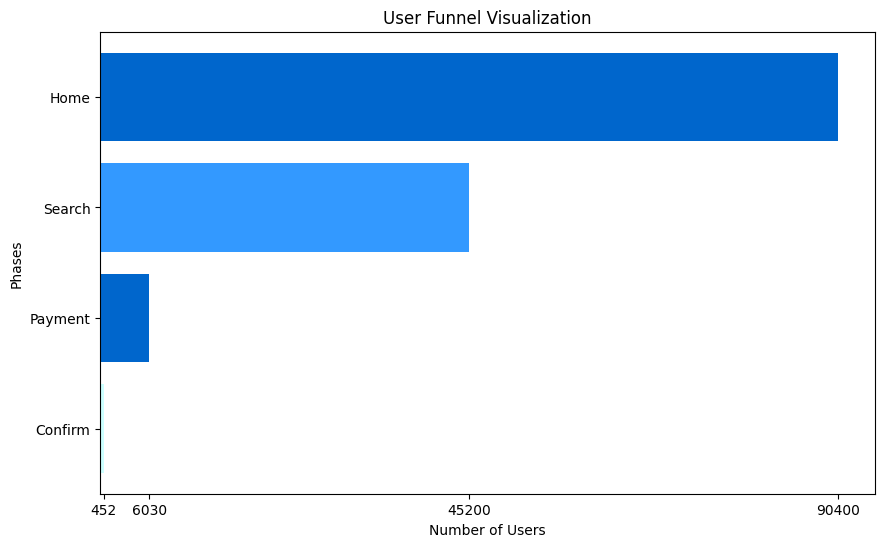

In [ ]:
# Chart stages data
# Let's inverse the order so that the Homepage and followings can come up first in the viz
phases = ['Confirm','Payment','Search', 'Home']
values = [452, 6030, 45200, 90400]

# Color of each funnel section
# colors = ['rgb(0, 102, 204)', 'rgb(51, 153, 255)', 'rgb(0, 102, 204)', 'rgb(204, 255, 255)']
colors = [(204/255, 255/255, 255/255), (0/255, 102/255, 204/255), (51/255, 153/255, 255/255), (0/255, 102/255, 204/255)]


# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the funnel chart
ax.barh(phases, values, color=colors)

# Set the title and labels
ax.set_title('User Funnel Visualization')
ax.set_xlabel('Number of Users')
ax.set_ylabel('Phases')

# Set the x-axis tick positions and labels
ax.set_xticks(values)
ax.set_xticklabels(values)

# Show the plot
plt.show()



Here's the visual representation of the table above, now we can see clearly how the user convertion works for each page and which page deserve some specific actions.

# **User conversion by genre**

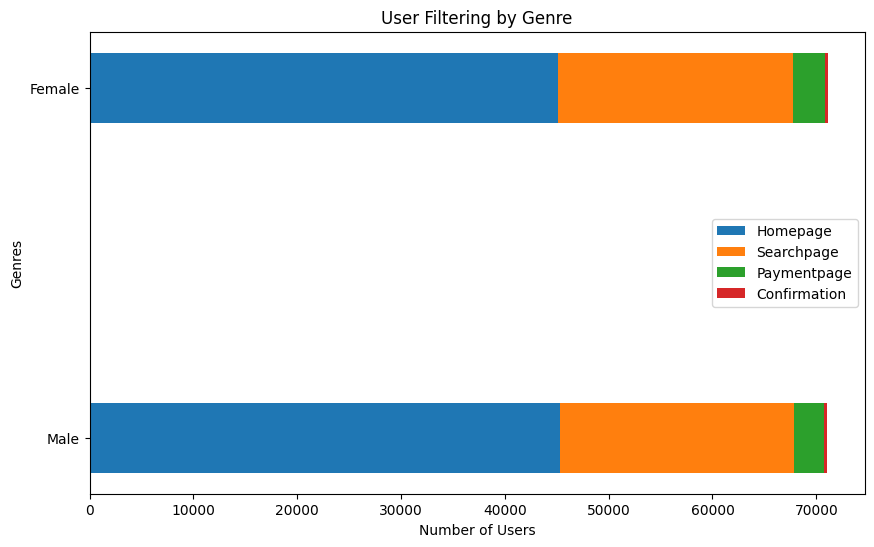

In [ ]:
# Genres
genres = ['Male', 'Female']

# Funnel stages data for each genre
home_Page = [45325, 45075]
search_Page = [22524, 22676]
payment_Page = [2930, 3100]
confirmation_Page = [211, 241]

# Funnel stage labels
stages = ['Home_Page', 'Search_Page', 'Payment_Page', 'Confirmation_Page']

# Set up positions for the bars
bar_positions = range(len(genres))

# Set up the bar width
bar_width = 0.2

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the funnel stages for each genre
ax.barh(bar_positions, home_Page, height=bar_width, label='Homepage')
ax.barh(bar_positions, search_Page, height=bar_width, left=home_Page, label='Searchpage')
ax.barh(bar_positions, payment_Page, height=bar_width, left=[x + y for x, y in zip(home_Page, search_Page)], label='Paymentpage')
ax.barh(bar_positions, confirmation_Page, height=bar_width, left=[x + y + z for x, y, z in zip(home_Page, search_Page, payment_Page)], label='Confirmation')

# Set the title and labels
ax.set_title('User Filtering by Genre')
ax.set_xlabel('Number of Users')
ax.set_ylabel('Genres')

# Set the y-axis tick positions and labels
ax.set_yticks(bar_positions)
ax.set_yticklabels(genres)

# Add a legend
ax.legend()

# Show the plot
plt.show()


# **User conversion by genre - Histogram**

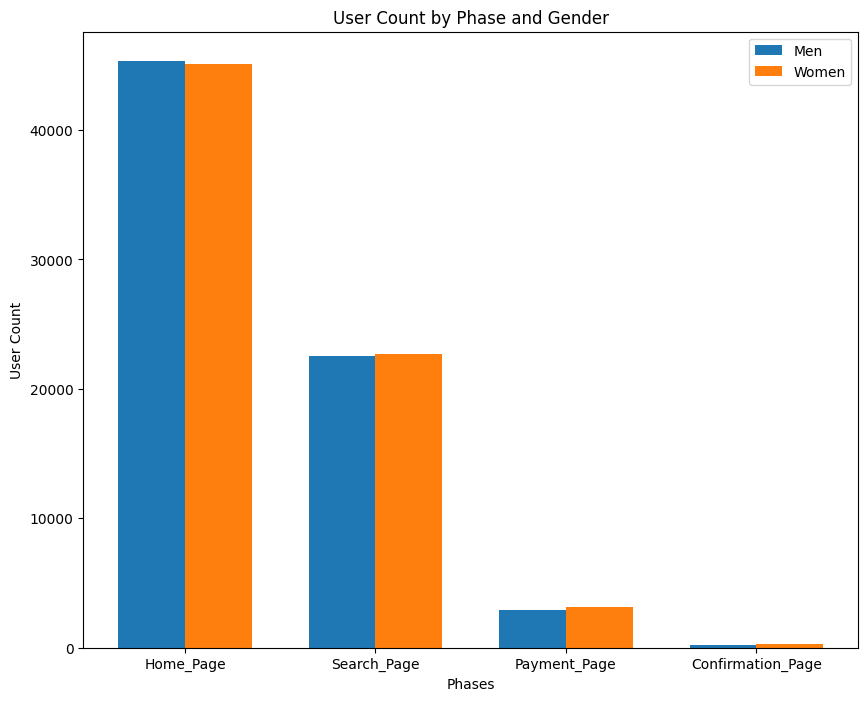

In [ ]:
# Sample data
phases = ['Home', 'Search', 'Payment', 'Confirm']
men_data = [45325, 22524, 2930, 211]
women_data = [45075, 22676, 3100, 241]

# Generate x-axis ticks
x = np.arange(len(phases))

# Width of the bars
width = 0.35

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the bars for Men
rects1 = ax.bar(x - width/2, men_data, width, label='Men')

# Plot the bars for Women
rects2 = ax.bar(x + width/2, women_data, width, label='Women')

# Set labels and title
ax.set_xlabel('Phases')
ax.set_ylabel('User Count')
ax.set_title('User Count by Phase and Gender')
ax.set_xticks(x)
ax.set_xticklabels(stages)
ax.legend()

# Display the plot
plt.show()



From the previous visualizations, we can observe that from the Search page and the Confirmation page, there are slightly more Women conversion activity than Men.

# **User conversion by devices - Pie chart**

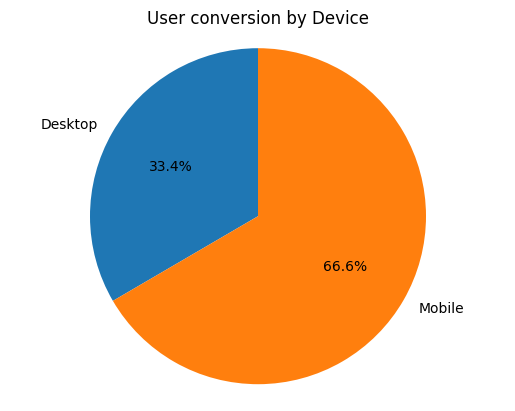

In [ ]:
# Sample data
devices = ['Desktop', 'Mobile']
men_data = [15122, 30203]
women_data = [15078, 29997]
# device_count = [30200, 60200]

# Combine the data for both genders
# total_data = [men_data, women_data]

# Combine the data for Men and Women for each stage
total_data = [men_data[i] + women_data[i] for i in range(len(devices))]

# Colors for the pie chart
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(total_data, labels=devices, colors=colors, autopct='%1.1f%%', startangle=90)

# Set aspect ratio to be equal so that pie is drawn as a circle
ax.axis('equal')

# Set title
ax.set_title('User conversion by Device')

# Display the plot
plt.show()


As the graphic shows, 66.6% of the users are using a mobile device, the others are using a desktop. 
In regard to the user conversion decrease, we can assume that the cause in decrease may be due to:


*   A bad user interface or experience specially in mobile devices.
*   A trust in Security about sensitive information since the biggest drop happen to be from the Payment page to the Confirmation page.
*   Technical issue such as crashes, errors or slow performace.

To mend the major drop issue, the company should gather information from the users to know what they like and don't like about their experience on the app, conduct test on the most affected pages to check if there aren't any issues, bugs, crashes or other issues that may discouraged the users from continuing further.



